#### Importowanie niezbędnych bibliotek. Wczytanie danych z CSV.

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


#### Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [4]:
subdata = data.pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc=lambda x: x.nunique())
subdata

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


#### Dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [5]:
def proc(row):
    y = row[True] / (row[True] + row[False])
    return y.round(2)

subdata['illness %']=subdata.apply(lambda row: proc(row), axis='columns')
subdata.sort_values(by='illness %', ascending=False, inplace=True)
subdata

signs_of_mental_illness,False,True,illness %
race,,,
W,1763,713,0.29
A,69,24,0.26
O,37,11,0.23
N,64,14,0.18
H,745,157,0.17
B,1114,184,0.14


#### Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [6]:
data['day']=pd.DatetimeIndex(data['date']).weekday
data['weekday']=pd.DatetimeIndex(data['date']).day_name()
data_by_day=data.groupby(['weekday', 'day']).id.count().to_frame()
data_by_day.sort_values(by='day', inplace=True)
data_by_day

,,id
weekday,day,
Monday,0,726
Tuesday,1,816
Wednesday,2,829
Thursday,3,810
Friday,4,761
Saturday,5,721
Sunday,6,753


Text(0, 0.5, 'liczba interwencji')

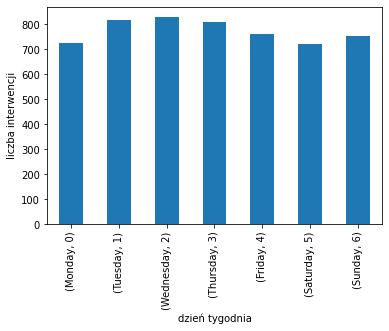

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data_by_day['id'].plot(kind='bar')

plt.xlabel('dzień tygodnia') 
plt.ylabel('liczba interwencji')

#### Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [8]:
states_by_population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
df_01 = states_by_population[0]
df_01.head()

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%


In [9]:
df_population = df_01[['State', 'Population estimate, July 1, 2019[2]']]
df_population.head()

,State,"Population estimate, July 1, 2019[2]"
0,California,39512223
1,Texas,28995881
2,Florida,21477737
3,New York,19453561
4,Pennsylvania,12801989


In [10]:
states_territory_abbreviations = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', match='Name and status of region', skiprows=9)
df_02 = states_territory_abbreviations[0]
df_02.drop([0],inplace=True)
df_02.head()

,Name and status of region,Name and status of region.1,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Otherabbreviations
1,United States of America,Federal state,.mw-parser-output .monospaced{font-family:mono...,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[1]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN
5,Arkansas,State,US-AR,AR,5.0,AR,AR,Ark.,Ark.,NaN


In [11]:
df_abb = df_02.loc[:, ['Name and status of region', 'ANSI']]
df_abb.rename(columns={'Name and status of region':'Name', 'ANSI':'Abb'}, inplace=True)
df_abb.head()

,Name,Abb
1,United States of America,US
2,Alabama,AL
3,Alaska,AK
4,Arizona,AZ
5,Arkansas,AR


In [27]:
dict_id = {}
for i in range(len(df_abb['Name'])):
    dict_id[df_abb['Name'].iloc[i]] = df_abb['Abb'].iloc[i]

In [28]:
df_joined = df_population.copy()
df_joined['State abb'] = df_joined['State'].map(dict_id)
df_joined.head()

,State,"Population estimate, July 1, 2019[2]",State abb,number_of_incidents
0,California,39512223,CA,799.0
1,Texas,28995881,TX,481.0
2,Florida,21477737,FL,350.0
3,New York,19453561,NY,101.0
4,Pennsylvania,12801989,PA,108.0


In [17]:
incident_by_state = data.groupby('state').id.count().to_frame()
incident_by_state.reset_index(level=0, inplace=True)
incident_by_state.rename(columns={'id':'number_of_incidents'}, inplace=True)
incident_by_state.head()

,state,number_of_incidents
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799


In [30]:
dict_id = {}
for i in range(len(incident_by_state['state'])):
    dict_id[incident_by_state['state'].iloc[i]]= incident_by_state['number_of_incidents'].iloc[i]

In [31]:
df_joined['number_of_incidents'] = df_joined['State abb'].map(dict_id)
df_joined.head()

,State,"Population estimate, July 1, 2019[2]",State abb,number_of_incidents
0,California,39512223,CA,799.0
1,Texas,28995881,TX,481.0
2,Florida,21477737,FL,350.0
3,New York,19453561,NY,101.0
4,Pennsylvania,12801989,PA,108.0


In [32]:
df_joined['incidents_per_1000'] = df_joined['number_of_incidents']/df_joined['Population estimate, July 1, 2019[2]']*1000
df_joined.head()

,State,"Population estimate, July 1, 2019[2]",State abb,number_of_incidents,incidents_per_1000
0,California,39512223,CA,799.0,0.020222
1,Texas,28995881,TX,481.0,0.016589
2,Florida,21477737,FL,350.0,0.016296
3,New York,19453561,NY,101.0,0.005192
4,Pennsylvania,12801989,PA,108.0,0.008436
